### Sequence Alignment

In [16]:
# Hemoglobin Beta Protein
# Current Species:
# Human, Chimpanzee, Bonobo, Bovine, Rat, Mouse, FruitFly

from Bio import AlignIO
from Bio.Align.Applications import ClustalOmegaCommandline
import os

# Input file containing sequences in FASTA format
input_file = "Sequences_Combined.fasta"

# Run Clustal Omega for multiple sequence alignment
output_file = "alignment.fasta"

# Delete the output file if it already exists
if os.path.isfile(output_file):
    os.remove(output_file)

clustalo_cline = ClustalOmegaCommandline(infile=input_file, outfile=output_file, verbose=True, auto=True)
clustalo_cline()

# Parse the alignment output
alignment = AlignIO.read(output_file, "fasta")

# Print the alignment
print(alignment)

Alignment with 9 rows and 1716 columns
-------------------ACATTTGCTTCTGACACAACTGTGT...CAA Human
--------ATCTATTGCTTACATTTGCTTCTGACACAACTGTGT...CAA Chimpanzee
----AGCCATCTATTGCTTACATTTGCTTCTGACACAACTGTGT...CAA Bonobo
-------------------ACACTTGCTTCTGACACAACTGTGT...CAA Crab-Eating_Macaque
--------------------------------------------...--- Rhesus_Monkey
--------------------------------------------...--- Cattle
GCCGGGCCAGCTGCTGCTTACACTTGCTTCTGACACAACCGTGT...A-- Water_Buffalo
------------------------TGCTTCTGACATAGTTGTGT...C-- Rat
-------------------ACACTTGCTTTTGCACACTTGAGAT...TG- Mouse


### Evolutionary Distance Calculation

In [17]:
from Bio.Phylo.TreeConstruction import DistanceCalculator
import pandas as pd

# Calculate the evolutionary distance
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)

# Convert the distance matrix to a pandas DataFrame
df = pd.DataFrame(dm.matrix, index=dm.names, columns=dm.names)

# Format the output for better readability
pd.set_option('display.float_format', '{:.6f}'.format)  # Set float formatting

# Print the formatted distance matrix using pandas DataFrame
print(df.to_string(na_rep='', justify='right'))

                       Human  Chimpanzee   Bonobo  Crab-Eating_Macaque  Rhesus_Monkey   Cattle  Water_Buffalo      Rat    Mouse
Human               0.000000                                                                                                   
Chimpanzee          0.026224    0.000000                                                                                       
Bonobo              0.019231    0.015152 0.000000                                                                              
Crab-Eating_Macaque 0.078671    0.092075 0.086830             0.000000                                                         
Rhesus_Monkey       0.163753    0.177156 0.171911             0.094988       0.000000                                          
Cattle              0.624709    0.632284 0.632284             0.624709       0.532634 0.000000                                 
Water_Buffalo       0.445221    0.444639 0.437646             0.437646       0.487179 0.500583       0.0

### Phylogenetic Tree

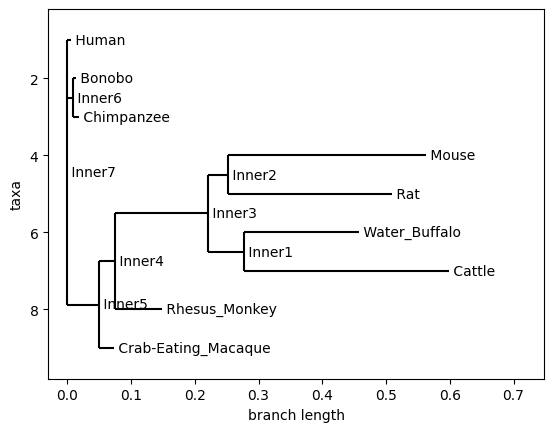

In [32]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

# Build the tree using the neighbor-joining method
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

# Print the tree
Phylo.draw(tree)

### Ka/Ks Ratio

In [37]:
from Bio import pairwise2, SeqIO

# Read sequences from FASTA file
sequences = []
sequence_names = []
for record in SeqIO.parse("Sequences_Combined.fasta", "fasta"):
    sequence_names.append(record.description.split()[0])
    sequences.append(record.seq)

# Calculate the Ka/Ks ratio for each pair of sequences
for i in range(len(sequences)):
    for j in range(i + 1, len(sequences)):
        sequence1 = sequences[i]
        sequence2 = sequences[j]
        sequence1_name = sequence_names[i]
        sequence2_name = sequence_names[j]

        # Perform sequence alignment using the Needleman-Wunsch algorithm
        alignments = pairwise2.align.globalxs(sequence1, sequence2, -1, -1, score_only=True)

        # Calculate the Ka/Ks ratio
        ka = 0
        ks = 0
        for a, b in zip(sequence1, sequence2):
            if a != b:
                ka += 1
            else:
                if a != '-':
                    ks += 1

        ka_ks_ratio = ka / ks

        print(f"[{sequence1_name}]        -       [{sequence2_name}]:")
        print("Ka: ", ka)
        print("Ks: ", ks)
        print("Ka/Ks Ratio: ", ka_ks_ratio)
        print()

[Human]        -       [Chimpanzee]:
Ka:  1160
Ks:  443
Ka/Ks Ratio:  2.618510158013544

[Human]        -       [Bonobo]:
Ka:  1165
Ks:  443
Ka/Ks Ratio:  2.62979683972912

[Human]        -       [Crab-Eating_Macaque]:
Ka:  605
Ks:  1003
Ka/Ks Ratio:  0.6031904287138584

[Human]        -       [Rhesus_Monkey]:
Ka:  1034
Ks:  426
Ka/Ks Ratio:  2.427230046948357

[Human]        -       [Cattle]:
Ka:  821
Ks:  322
Ka/Ks Ratio:  2.549689440993789

[Human]        -       [Water_Buffalo]:
Ka:  1197
Ks:  411
Ka/Ks Ratio:  2.9124087591240877

[Human]        -       [Rat]:
Ka:  992
Ks:  420
Ka/Ks Ratio:  2.361904761904762

[Human]        -       [Mouse]:
Ka:  1101
Ks:  424
Ka/Ks Ratio:  2.5966981132075473

[Chimpanzee]        -       [Bonobo]:
Ka:  1167
Ks:  436
Ka/Ks Ratio:  2.676605504587156

[Chimpanzee]        -       [Crab-Eating_Macaque]:
Ka:  1172
Ks:  431
Ka/Ks Ratio:  2.719257540603248

[Chimpanzee]        -       [Rhesus_Monkey]:
Ka:  1069
Ks:  391
Ka/Ks Ratio:  2.734015345268542

[Ch